Consensus Timeのプロット（単体）

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean


def get_consensus_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list


1.9145239206534423


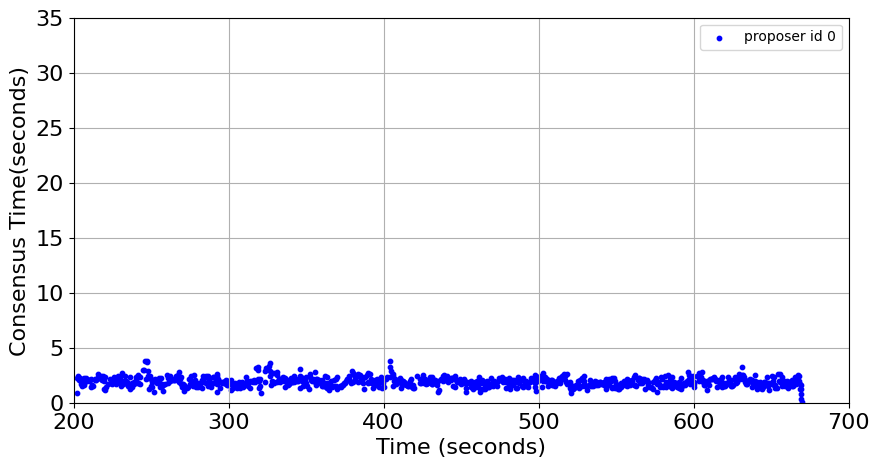

In [5]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean

# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 128
network_delay = 0
proposer_id_list = [1]

start_time_2lists = []
consensus_time_2lists = []


for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion_fixed_vehicle_num/fixed_v20/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    print(mean(consensus_time_list))
    start_time_2lists.append(start_time_list)
    consensus_time_2lists.append(consensus_time_list)

# 3つwo1つのgraphにまとめる
plt.figure(figsize=(10, 5))
plt.scatter(start_time_2lists[0], consensus_time_2lists[0], c='blue', marker='o', s=10, label='proposer id 0')
# plt.scatter(start_time_2lists[1], consensus_time_2lists[1], c='green', marker='o', s=10, label='proposer id 1')
# plt.scatter(start_time_2lists[2], consensus_time_2lists[2], c='red', marker='o', s=10, label='proposer id 2')
plt.xlabel('Time (seconds)', fontsize=16)
plt.ylabel('Consensus Time(seconds)', fontsize=16)

plt.ylim(0, 35)
plt.xlim(200, 700)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend()
plt.show()






2.7378240223463686
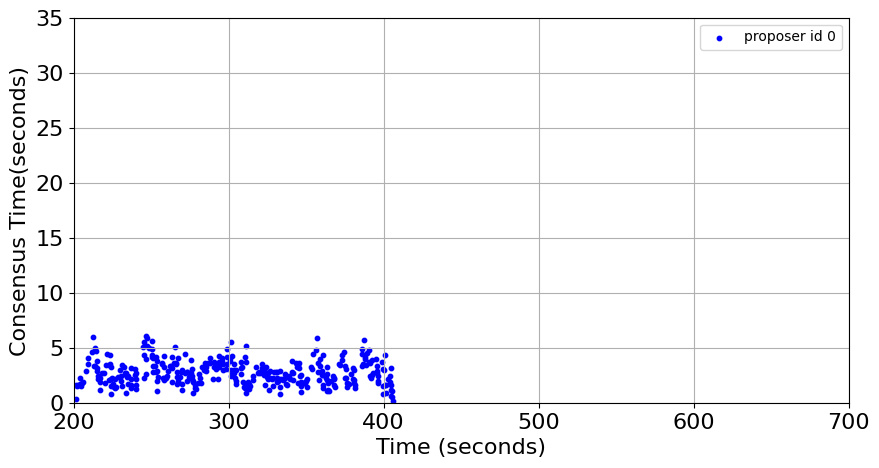

Consensus Timeのプロット（複数）

[[1.577116182572614], [1.522180055401662], [1.4451270949720671], [1.31824826629681]]


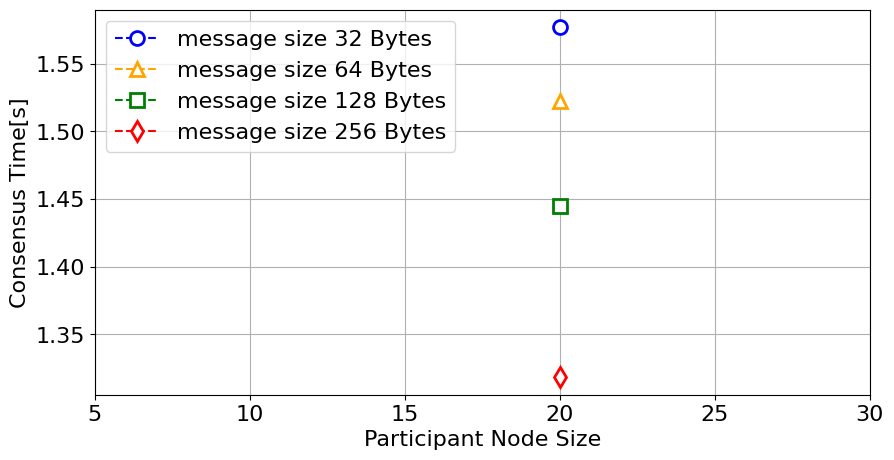

R² (Time ~ Node)          : 0.000
R² (Time ~ log2(Message)) : 0.965
R² (log(Time) ~ Node)     : 0.000
R² (log(Time) ~ log2(Msg)): 0.955


/tmp/ipykernel_91439/1128482660.py:64: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)  # y_hat = m*x + b
/tmp/ipykernel_91439/1128482660.py:64: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)  # y_hat = m*x + b


In [10]:
import numpy as np

# fixed_vehicle_num_list = [5, 10, 15, 20, 25, 30]
fixed_vehicle_num_list = [20]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size_list = [32, 64, 128, 256]
network_delay = 0
proposer_id = 1

start_time_2lists = []
consensus_mean_time_2lists = []


for message_size in message_size_list:
    consensus_mean_time_list = []
    for fixed_vehicle_num in fixed_vehicle_num_list:

        input_folder_path = "../../results/multi_rsu_congestion_fixed_vehicle_num/fixed_v"  + str(fixed_vehicle_num) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/3/"
        start_time_list, consensus_time_list = get_consensus_time(input_folder_path)

        consensus_mean_time_list.append(mean(consensus_time_list))
    
    consensus_mean_time_2lists.append(consensus_mean_time_list)

print(consensus_mean_time_2lists)

# 3つwo1つのgraphにまとめる
plt.figure(figsize=(10, 5))
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[0], c='blue', marker='o', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 32 Bytes')
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[1], c='orange', marker='^', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 64 Bytes')
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[2], c='green', marker='s', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 128 Bytes')
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[3], c='red', marker='d', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 256 Bytes')

plt.xlabel('Participant Node Size', fontsize=16)
plt.ylabel('Consensus Time[s]', fontsize=16)

plt.xticks(range(5, 31, 5),fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend(fontsize=16)
plt.show()


import numpy as np

def _r2_linear(x, y):
    """
    Compute R^2 of simple linear regression with intercept: y ~ a*x + b.
    Returns: float in [0, 1], or 0.0 if y has zero variance.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)

    # Total variance zero -> undefined slope; treat as no explanatory power
    if np.allclose(y.var(), 0.0):
        return 0.0

    # Fit a straight line with intercept
    m, b = np.polyfit(x, y, 1)  # y_hat = m*x + b
    y_hat = m * x + b

    # Residual and total sum of squares
    ss_res = np.sum((y - y_hat) ** 2)
    ss_tot = np.sum((y - y.mean()) ** 2)

    # Numerical safety
    if np.isclose(ss_tot, 0.0):
        return 0.0
    return 1 - ss_res / ss_tot


def r2_from_matrix(times_2d, node_levels, msg_sizes, use_logy=False):
    """
    Calculate R^2 for two separate simple regressions over all observations:
      1) Time ~ Node
      2) Time ~ log2(Message)

    Parameters
    ----------
    times_2d : array-like, shape (M, N)
        Matrix of consensus times. Rows = message sizes, columns = node levels.
    node_levels : array-like, length N
        Node counts corresponding to the columns of times_2d (e.g., [5,10,15,20,25,30]).
    msg_sizes : array-like, length M
        Message sizes corresponding to the rows of times_2d (e.g., [32,64,128,256]).
    use_logy : bool, default False
        If True, regress on log(Time) instead of Time to stabilize variance.

    Returns
    -------
    (r2_node, r2_log2msg) : tuple of floats
        R^2 for Time ~ Node (or log(Time) ~ Node) and Time ~ log2(Message)
        (or log(Time) ~ log2(Message)) respectively.
    """
    T = np.asarray(times_2d, dtype=float)
    if T.ndim != 2:
        raise ValueError("times_2d must be a 2D array (rows=messages, cols=nodes).")

    M, N = T.shape
    node_levels = np.asarray(node_levels, dtype=float)
    msg_sizes   = np.asarray(msg_sizes, dtype=float)

    if node_levels.size != N:
        raise ValueError(f"len(node_levels)={node_levels.size} must equal number of columns N={N}.")
    if msg_sizes.size != M:
        raise ValueError(f"len(msg_sizes)={msg_sizes.size} must equal number of rows M={M}.")

    # Flatten all observations row-wise: [row0..., row1..., ...]
    y = T.ravel(order="C")
    if use_logy:
        if np.any(y <= 0):
            raise ValueError("log(Time) requested but times contain non-positive values.")
        y = np.log(y)

    # Explanatory variables aligned with the flattened order
    x_node = np.tile(node_levels, M)                  # repeat node levels for each message row
    x_msg_log2 = np.repeat(np.log2(msg_sizes), N)     # repeat log2(message) for each node within a row

    # Compute R^2 for each simple regression
    r2_node = _r2_linear(x_node, y)
    r2_msg  = _r2_linear(x_msg_log2, y)
    return r2_node, r2_msg

def transpose_matrix(times_2d):
    """
    Return the transpose of a 2D matrix (rows <-> columns).

    Parameters
    ----------
    times_2d : array-like, shape (M, N)
        Original matrix.

    Returns
    -------
    Tt : np.ndarray, shape (N, M)
        Transposed matrix.
    """
    T = np.asarray(times_2d, dtype=float)
    if T.ndim != 2:
        raise ValueError("times_2d must be 2D.")
    return T.T.copy()
# ===== 使い方サンプル（あなたのデータ） =====
# node_levels = [5, 10, 15, 20, 25, 30]
node_levels = [20]
msg_sizes   = [32, 64, 128, 256]

r2_node, r2_msg = r2_from_matrix(consensus_mean_time_2lists, node_levels, msg_sizes,use_logy=False)
r2_node_logy, r2_msg_logy = r2_from_matrix(consensus_mean_time_2lists, node_levels, msg_sizes, use_logy=True)

print(f"R² (Time ~ Node)          : {r2_node:.3f}")
print(f"R² (Time ~ log2(Message)) : {r2_msg:.3f}")
print(f"R² (log(Time) ~ Node)     : {r2_node_logy:.3f}")
print(f"R² (log(Time) ~ log2(Msg)): {r2_msg_logy:.3f}")

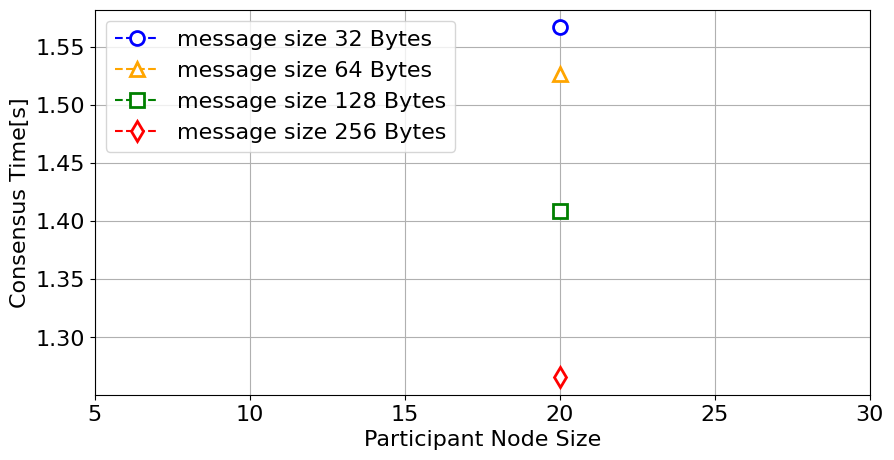

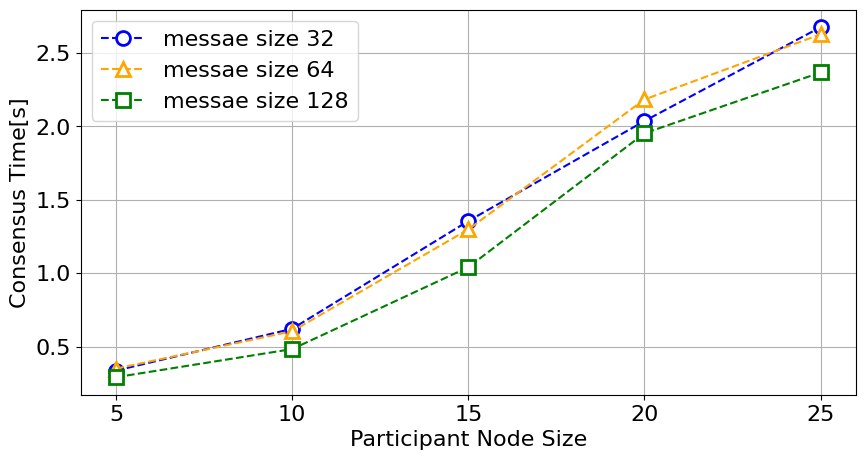

0.00863716814159292 0.07430088495575221 0.22175221238938053
0.013672064777327936 0.10834008097165992 0.5622955465587045
0.009798624754420433 0.1394548133595285 1.048303536345776
0.009477958236658934 0.21881438515081206 1.841792343387471
0.008703098106712565 0.2958657487091222 2.5544535283993115


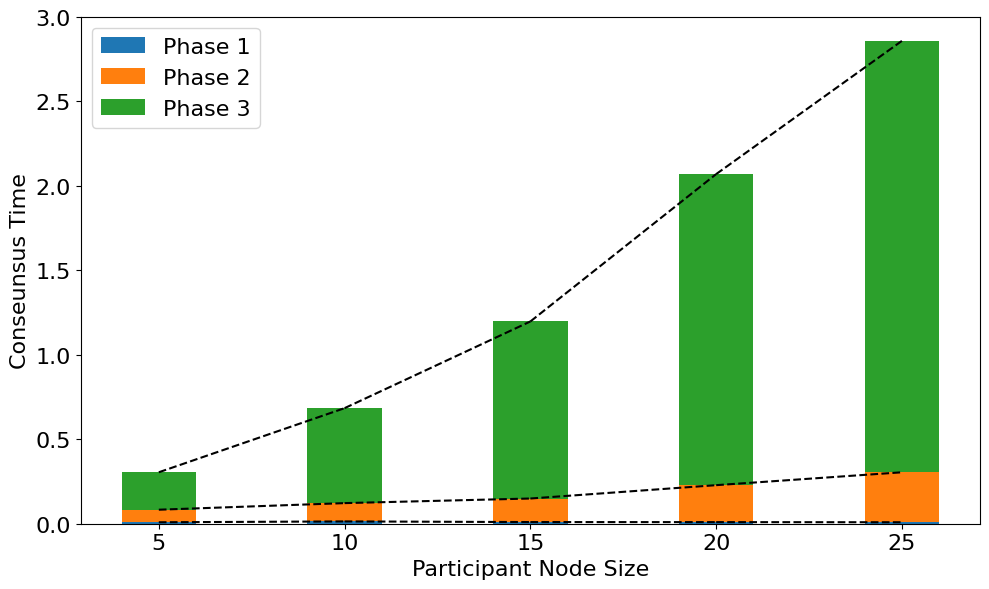

In [17]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np


def get_phase_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []
    simulation_phase_1_time_list = []
    simulation_phase_2_time_list = []
    simulation_phase_3_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)

        simulation_phase_1_time_list.append((int(row["end_phase_a_pro_time"]) - int(row["start_time"])) / 1000)
        simulation_phase_2_time_list.append((int(row["end_phase_a_vali_time"]) - int(row["end_phase_a_pro_time"])) / 1000)
        simulation_phase_3_time_list.append((int(row["end_time"]) - int(row["end_phase_a_vali_time"])) / 1000)

    print(mean(simulation_phase_1_time_list), mean(simulation_phase_2_time_list), mean(simulation_phase_3_time_list))
    


    return mean(simulation_phase_1_time_list), mean(simulation_phase_2_time_list), mean(simulation_phase_3_time_list)



fixed_vehicle_num_list = [5, 10, 15, 20, 25]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id = 1

simulation_phase_1_time_list = []
simulation_phase_2_time_list = []
simulation_phase_3_time_list = []

for fixed_vehicle_num in fixed_vehicle_num_list:
    input_folder_path = "../../results/multi_rsu_congestion_fixed_vehicle_num/fixed_v"  + str(fixed_vehicle_num) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    simulation_phase_1_time, simulation_phase_2_time, simulation_phase_3_time = get_phase_time(input_folder_path)
    simulation_phase_1_time_list.append(simulation_phase_1_time)
    simulation_phase_2_time_list.append(simulation_phase_2_time)
    simulation_phase_3_time_list.append(simulation_phase_3_time)

    

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 2.0

# Convert lists to numpy arrays for stacking
phase_1 = np.array(simulation_phase_1_time_list)
phase_2 = np.array(simulation_phase_2_time_list)
phase_3 = np.array(simulation_phase_3_time_list)

# Plot each phase stacked on top of each other
ax.bar(fixed_vehicle_num_list, phase_1, bar_width, label='Phase 1')
ax.bar(fixed_vehicle_num_list, phase_2, bar_width, bottom=phase_1, label='Phase 2')
ax.bar(fixed_vehicle_num_list, phase_3, bar_width, bottom=phase_1 + phase_2, label='Phase 3')

# 各Phaseの上に点線を追加
for i in range(len(fixed_vehicle_num_list) - 1):
    x1, x2 = fixed_vehicle_num_list[i], fixed_vehicle_num_list[i+1]
    ax.plot([x1, x2], [phase_1[i], phase_1[i+1]], 'k--')  # Phase 1
    ax.plot([x1, x2], [phase_1[i] + phase_2[i], phase_1[i+1] + phase_2[i+1]], 'k--')  # Phase 2
    ax.plot([x1, x2], [phase_1[i] + phase_2[i] + phase_3[i], phase_1[i+1] + phase_2[i+1] + phase_3[i+1]], 'k--')  # Phase 3


# Add labels, legend, and title
ax.set_xlabel('Participant Node Size', fontsize=16)
ax.set_ylabel('Conseunsus Time', fontsize=16)
# ax.set_title('Simulation Phase Times by Fixed Vehicle Number', fontsize=16)
ax.set_xticks(fixed_vehicle_num_list)
ax.legend(fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show plot
plt.tight_layout()
plt.show()




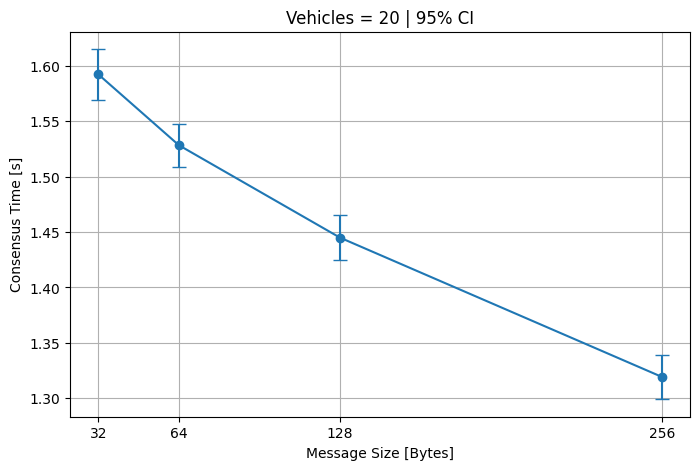

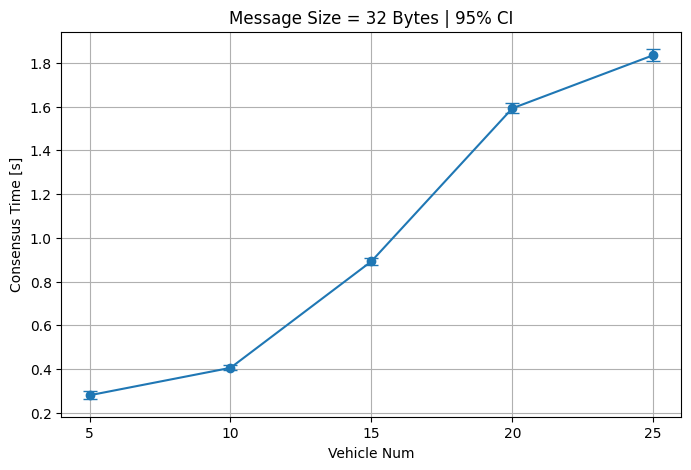

In [8]:
# --- ここから追記（get_consensus_time は変更しない） --------------------
import os
import math
from statistics import mean, stdev
import matplotlib.pyplot as plt

# 既存パラメータ（必要なものだけ使用）
fixed_vehicle_num_list = [5, 10, 15, 20, 25]
message_size_list = [32, 64, 128, 256]
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num   # 入力パス n〇〇〇 で使用
network_delay = 0
proposer_id = 1

# 入力パス生成（基準ディレクトリの末尾は必ず "/"）
def make_base_path(fixed_vehicle_num: int, message_size: int) -> str:
    return (
        "../../results/multi_rsu_congestion_fixed_vehicle_num/"
        f"fixed_v{fixed_vehicle_num}/n{participant_size}/m{message_size}/"
        f"d{network_delay}/{proposer_id}/"
    )

# 各実験(1〜10)の「1実験あたりの平均コンセンサス時間」を配列で返す
def per_run_mean_consensus_time(base_path: str, runs=range(1, 11)):
    per_run_means = []
    for r in runs:
        run_path = os.path.join(base_path, str(r)) + "/"
        try:
            _, consensus_time_list = get_consensus_time(run_path)  # 既存関数をそのまま利用
        except FileNotFoundError:
            # ファイルが無ければスキップ（任意で print などしてもOK）
            continue
        if consensus_time_list:
            per_run_means.append(mean(consensus_time_list))
    return per_run_means  # [run1の平均, run2の平均, ..., runNの平均]

# 平均と95%CI半幅（エラーバー用）を返す（t分布、df=n-1）
def mean_and_ci(per_run_values, alpha=0.05):
    n = len(per_run_values)
    if n == 0:
        return float("nan"), 0.0, 0
    m = mean(per_run_values)
    if n == 1:
        return m, 0.0, 1
    s = stdev(per_run_values)
    df = n - 1
    # 95%両側 t*（主要dfをカバー、無ければ正規近似1.96）
    t_table = {
        1: 12.706, 2: 4.303, 3: 3.182, 4: 2.776, 5: 2.571, 6: 2.447,
        7: 2.365, 8: 2.306, 9: 2.262, 10: 2.228, 11: 2.201, 12: 2.179,
        13: 2.160, 14: 2.145, 15: 2.131, 16: 2.120, 17: 2.110, 18: 2.101,
        19: 2.093, 20: 2.086, 24: 2.064, 30: 2.042
    }
    t_crit = t_table.get(df, 1.96)
    half_width = t_crit * s / math.sqrt(n)
    return m, half_width, n

# ========== 図1: vehicle_num=20 で message_size を変えたとき ==========
fixed_vehicle_num_for_plot = 20
x_ms = message_size_list
y_mean = []
y_ci = []
n_used = []

for ms in x_ms:
    base = make_base_path(fixed_vehicle_num_for_plot, ms)
    vals = per_run_mean_consensus_time(base)  # 各runの「平均コンセンサス時間」
    m, h, n = mean_and_ci(vals)
    y_mean.append(m)
    y_ci.append(h)
    n_used.append(n)

plt.figure(figsize=(8, 5))
plt.errorbar(x_ms, y_mean, yerr=y_ci, marker='o', capsize=5)
plt.xlabel('Message Size [Bytes]')
plt.ylabel('Consensus Time [s]')
plt.title(f'Vehicles = {fixed_vehicle_num_for_plot} | 95% CI')
plt.grid(True)
plt.xticks(x_ms)
plt.show()

# ========== 図2: message_size=32 で vehicle_num を変えたとき ==========
message_size_fixed = 32
x_v = fixed_vehicle_num_list
y_mean = []
y_ci = []
n_used = []

for v in x_v:
    base = make_base_path(v, message_size_fixed)
    vals = per_run_mean_consensus_time(base)
    m, h, n = mean_and_ci(vals)
    y_mean.append(m)
    y_ci.append(h)
    n_used.append(n)

plt.figure(figsize=(8, 5))
plt.errorbar(x_v, y_mean, yerr=y_ci, marker='o', capsize=5)
plt.xlabel('Vehicle Num')
plt.ylabel('Consensus Time [s]')
plt.title(f'Message Size = {message_size_fixed} Bytes | 95% CI')
plt.grid(True)
plt.xticks(x_v)
plt.show()
# --- 追記ここまで --------------------------------------------------------


/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) m

=== vehicle_num=20, message_size別 ===
message_size= 32B: mean=2.070s, 95%CI±0.031s, n=862
message_size= 64B: mean=1.976s, 95%CI±0.031s, n=858
message_size=128B: mean=1.915s, 95%CI±0.029s, n=857
message_size=256B: mean=1.740s, 95%CI±0.026s, n=871

=== message_size=32, vehicle_num別 ===
vehicle_num= 5: mean=0.305s, 95%CI±0.023s, n=113
vehicle_num=10: mean=0.684s, 95%CI±0.036s, n=247
vehicle_num=15: mean=1.198s, 95%CI±0.018s, n=1018
vehicle_num=20: mean=2.070s, 95%CI±0.031s, n=862
vehicle_num=25: mean=2.859s, 95%CI±0.042s, n=1162


/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 38291 (\N

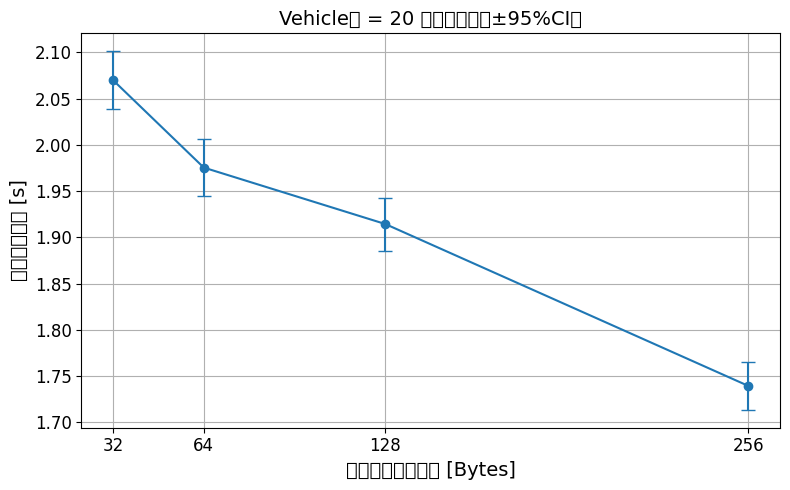

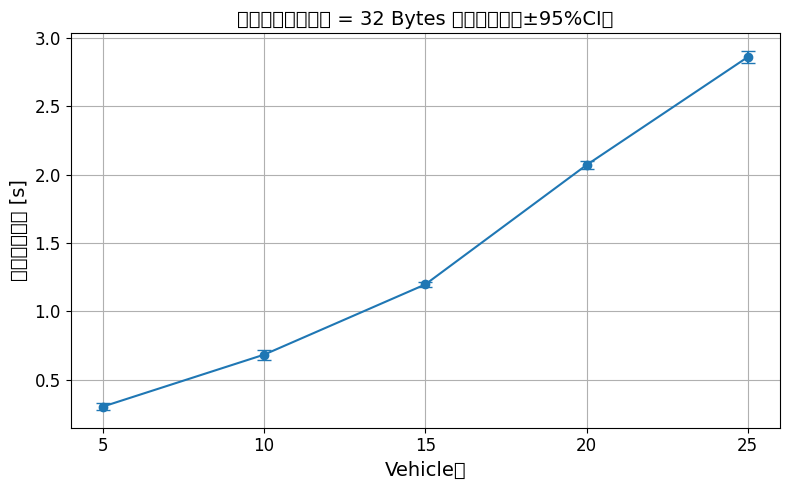

In [9]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean, stdev
import math
import os

# =========================================================
# 元の関数（変更なし）
# =========================================================
def get_consensus_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list


# =========================================================
# パラメータ（元コード準拠）
# =========================================================
fixed_vehicle_num_list = [5, 10, 15, 20, 25]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size_list = [32, 64, 128, 256]
network_delay = 0
proposer_id = 1

# =========================================================
# 95%信頼区間（平均±CI半幅）: t分布(表)→なければ1.96にフォールバック
# =========================================================
_tcrit_95_two_tailed = {
    # df: t*
    1: 12.706, 2: 4.303, 3: 3.182, 4: 2.776, 5: 2.571,
    6: 2.447, 7: 2.365, 8: 2.306, 9: 2.262, 10: 2.228,
    11: 2.201, 12: 2.179, 13: 2.160, 14: 2.145, 15: 2.131,
    16: 2.120, 17: 2.110, 18: 2.101, 19: 2.093, 20: 2.086,
    21: 2.080, 22: 2.074, 23: 2.069, 24: 2.064, 25: 2.060,
    26: 2.056, 27: 2.052, 28: 2.048, 29: 2.045, 30: 2.042
}
def mean_and_ci_95(samples):
    n = len(samples)
    if n == 0:
        return float("nan"), 0.0, 0
    m = mean(samples)
    if n == 1:
        return m, 0.0, 1  # CIは出せないので0表示
    sd = stdev(samples)
    se = sd / math.sqrt(n)
    df = n - 1
    tcrit = _tcrit_95_two_tailed.get(df, 1.96)  # df>30は≈1.96で近似
    half = tcrit * se
    return m, half, n

# =========================================================
# ① vehicle_num=20固定で message_size を変更
# =========================================================
fixed_vehicle_num_for_plot1 = 20
msg_sizes = message_size_list[:]  # [32, 64, 128, 256]
means_1, ci_1, ns_1 = [], [], []

for ms in msg_sizes:
    input_folder_path = (
        "../../results/multi_rsu_congestion_fixed_vehicle_num/"
        f"fixed_v{fixed_vehicle_num_for_plot1}/n{participant_size}/m{ms}/"
        f"d{network_delay}/{proposer_id}/"
    )
    if not os.path.exists(input_folder_path):
        print(f"[WARN] path not found: {input_folder_path}")
        means_1.append(float("nan")); ci_1.append(0.0); ns_1.append(0)
        continue

    _, consensus_times = get_consensus_time(input_folder_path)
    m, hw, n = mean_and_ci_95(consensus_times)
    means_1.append(m); ci_1.append(hw); ns_1.append(n)

plt.figure(figsize=(8,5))
plt.errorbar(msg_sizes, means_1, yerr=ci_1, fmt='-o', capsize=5, elinewidth=1.5)
plt.xlabel('メッセージサイズ [Bytes]', fontsize=14)
plt.ylabel('合意形成時間 [s]', fontsize=14)
plt.title(f'Vehicle数 = {fixed_vehicle_num_for_plot1} のとき（平均±95%CI）', fontsize=14)
plt.xticks(msg_sizes, fontsize=12); plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
# 保存したい場合は以下を有効化
# plt.savefig("consensus_time_vehicle20_vs_message_size.png", dpi=200)

print("=== vehicle_num=20, message_size別 ===")
for ms, m, hw, n in zip(msg_sizes, means_1, ci_1, ns_1):
    print(f"message_size={ms:>3}B: mean={m:.3f}s, 95%CI±{hw:.3f}s, n={n}")

# =========================================================
# ② message_size=32固定で vehicle_num を変更
# =========================================================
fixed_message_size_for_plot2 = 32
veh_nums = fixed_vehicle_num_list[:]  # [5, 10, 15, 20, 25, 30]
means_2, ci_2, ns_2 = [], [], []

for vnum in veh_nums:
    input_folder_path = (
        "../../results/multi_rsu_congestion_fixed_vehicle_num/"
        f"fixed_v{vnum}/n{participant_size}/m{fixed_message_size_for_plot2}/"
        f"d{network_delay}/{proposer_id}/"
    )
    if not os.path.exists(input_folder_path):
        print(f"[WARN] path not found: {input_folder_path}")
        means_2.append(float("nan")); ci_2.append(0.0); ns_2.append(0)
        continue

    _, consensus_times = get_consensus_time(input_folder_path)
    m, hw, n = mean_and_ci_95(consensus_times)
    means_2.append(m); ci_2.append(hw); ns_2.append(n)

plt.figure(figsize=(8,5))
plt.errorbar(veh_nums, means_2, yerr=ci_2, fmt='-o', capsize=5, elinewidth=1.5)
plt.xlabel('Vehicle数', fontsize=14)
plt.ylabel('合意形成時間 [s]', fontsize=14)
plt.title(f'メッセージサイズ = {fixed_message_size_for_plot2} Bytes のとき（平均±95%CI）', fontsize=14)
plt.xticks(veh_nums, fontsize=12); plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
# 保存したい場合は以下を有効化
# plt.savefig("consensus_time_msg32_vs_vehicle_num.png", dpi=200)

print("\n=== message_size=32, vehicle_num別 ===")
for v, m, hw, n in zip(veh_nums, means_2, ci_2, ns_2):
    print(f"vehicle_num={v:>2}: mean={m:.3f}s, 95%CI±{hw:.3f}s, n={n}")


CDF(Cumulative Distribution Function)のプロット

In [4]:
import numpy as np
from scipy.stats import norm

# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]

start_time_2lists_no_rl = []
consensus_time_2lists_no_rl = []
start_time_2lists_with_rl = []
consensus_time_2lists_with_rl = []

for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists_no_rl.append(start_time_list)
    consensus_time_2lists_no_rl.append(consensus_time_list)


for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion_with_immu/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists_with_rl.append(start_time_list)
    consensus_time_2lists_with_rl.append(consensus_time_list)


# # データをソート
# sorted_data = np.sort(consensus_time_list)
# # 経験的なCDFの計算
# cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# # プロット
# plt.figure(figsize=(8, 5))
# plt.plot(sorted_data, cdf_values, marker='o', linestyle='-', color='b', label="Empirical CDF")


# plt.xlabel("Data values")
# plt.ylabel("CDF")
# plt.title("Cumulative Distribution Function (CDF)")
# plt.grid(True)
# plt.legend()
# plt.show()




# plt.figure(figsize=(10, 6))

# # consensus_time_2lists_no_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='-', label=f"No RL Proposer {i}")

# # consensus_time_2lists_with_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='--', label=f"With RL Proposer {i}")


# # グラフの詳細設定（フォントサイズの調整）
# plt.xlabel("Consensus Time", fontsize=14)
# plt.ylabel("CDF", fontsize=14)
# plt.title("Cumulative Distribution Function (CDF) for Consensus Times", fontsize=16)
# plt.xlim(0, 30)  # X軸の最大値を30に設定
# plt.grid(True)
# plt.legend(fontsize=12)
# plt.show()


# 色のリスト
colors = ['b', 'g', 'r']  # プロポーザごとに異なる色を設定

# CDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='--', color=colors[i], label=f"No RL CDF Proposer {i}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='-', color=colors[i], label=f"With RL CDF Proposer {i}")

plt.xlabel("Consensus Time(s)", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.title("CDF for Consensus Times", fontsize=20)
plt.xlim(0, 40)  # X軸の最大値を30に設定
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

# CCDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='--', color=colors[i], label=f"No RL CCDF Proposer {i}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='-', color=colors[i], label=f"With RL CCDF Proposer {i}")

# 縦軸を対数スケールに設定
plt.yscale("log")

# グラフの詳細設定
plt.xlabel("Consensus Time(s)", fontsize=14)
plt.ylabel("CCDF", fontsize=14)
plt.title("CCDF for Consensus Times", fontsize=20)
plt.xlim(0, 40)  # X軸の最大値を30に設定
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # 対数スケールで両方の目盛り線を表示
plt.legend(fontsize=10)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../results/multi_rsu_congestion_with_immu/vs80_20/n253/m32/d0/0/consensus_folder.csv'